In [1]:
import numpy as np
from theano import *
import theano.tensor as T
from sklearn import preprocessing
import pandas as pd
#plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [2]:
# Network Layout
features_count = 3
hidden_count = 2
num_layers = 2

x = T.dvector('x')
w1 = theano.shared(numpy.random.randn(features_count, hidden_count), name="w1")
b1 = theano.shared(numpy.random.randn(hidden_count), name="b1")
z1 = x.dot(w1) + b1
a1 = T.nnet.sigmoid( z1 )
w2 = theano.shared(numpy.random.randn(hidden_count ,features_count), name="w2")
b2 = theano.shared(numpy.random.randn(features_count), name="b2")
z2 = a1.dot(w2) + b2
a2 = T.nnet.sigmoid( z2 )

feedforward = function([x], a2, name='feedforward')

In [3]:
# Define Training Functions
eta = theano.shared(0.1,name='eta')
output = T.dvector('output')
cost_graph = ((a2 - x)**2).sum()
compute_cost = function([x], cost_graph, name='compute_cost')
#compute_avg_cost = theano.scan(fn=compute_cost, sequences=[X], outputs_info=None)
def compute_avg_cost(dataset):
    avg_cost = 0
    for r in dataset:
        avg_cost += compute_cost(r) / dataset.shape[1]
    return avg_cost

grad_w2, grad_b2, grad_a_L = T.grad(cost_graph, [w2,b2,a2])
#pp(grad)
#compute_gradient = function([x], cost_grad, name='compute_gradient')

grad_a_L_wtrt_z_L = T.jacobian(expression=a2, wrt=z2).diagonal()
error_L = grad_a_L * grad_a_L_wtrt_z_L
grad_a_l_wtrt_t_l = T.jacobian(expression=a1, wrt=z1).diagonal()
error_l = (w2.dot(error_L)) * grad_a_l_wtrt_t_l
x_as_matrix = x.reshape((features_count, 1)) # transpose and shape to (k x 1) so that matrix multiplication is possible
grad_w1 =  x_as_matrix * error_l #theano.scan(error_l.dot, sequences=x)# error_l.dot(x)
grad_b1 = error_l

delta_w2 = -eta * (grad_w2) 
delta_b2 = -eta * (grad_b2)
delta_w1 = -eta * (grad_w1)
delta_b1 = -eta * (grad_b1)
print('grad_w2',function([x],grad_w2)([1,2,3]))
print('grad_b2',function([x],grad_b2)([1,2,3]))
print('delta_w2',function([x],delta_w2)([1,2,3]))
print('delta_b2',function([x],delta_b2)([1,2,3]))
print('delta_w1',function([x],delta_w1)([1,2,3]))
print('delta_b1',function([x],delta_b1)([1,2,3]))
print('a2',function([x],a2)([1,2,3]))
print('grad_a2', function([x],grad_a_L)([1,2,3]))
print('jacob_L', function([x],grad_a_L_wtrt_z_L)([1,2,3]))
print('error_L', function([x],error_L)([1,2,3]))
print('jacob_l', function([x],grad_a_L_wtrt_z_L)([1,2,3]))
print('w2.dot(error_L)', function([x],(w2.dot(error_L)))([1,2,3]))
print('error_l', function([x],error_l)([1,2,3]))
print('w1', w1.get_value())
print('x_as_matrix', function([x],x_as_matrix)([1,2,3]))
print('grad_w1', function([x],grad_w1)([1,2,3]))
print('cost', compute_cost([1,2,3]))
update_L = function([x], updates=[(w2, w2 + delta_w2), (b2, b2 + delta_b2)])
update_l = function([x], updates=[(w1, w1 + delta_w1), (b1, b1 + delta_b1)])
update_all = function([x], updates=[(w1, w1 + delta_w1), (b1, b1 + delta_b1), (w2, w2 + delta_w2), (b2, b2 + delta_b2)])

grad_w2 [[ -9.39714189e-02  -5.03760384e-01  -7.66504597e-01]
 [ -2.49446735e-05  -1.33722981e-04  -2.03468322e-04]]
grad_b2 [-0.10504494 -0.5631231  -0.85682888]
delta_w2 [[  9.39714189e-03   5.03760384e-02   7.66504597e-02]
 [  2.49446735e-06   1.33722981e-05   2.03468322e-05]]
delta_b2 [ 0.01050449  0.05631231  0.08568289]
delta_w1 [[ -1.26001561e-03   2.23969959e-06]
 [ -2.52003121e-03   4.47939918e-06]
 [ -3.78004682e-03   6.71909876e-06]]
delta_b1 [ -1.26001561e-03   2.23969959e-06]
a2 [ 0.73216443  0.6880948   0.18746739]
grad_a2 [-0.53567113 -2.62381041 -5.62506522]
jacob_L [ 0.19609968  0.21462035  0.15232337]
error_L [-0.10504494 -0.5631231  -0.85682888]
jacob_l [ 0.19609968  0.21462035  0.15232337]
w2.dot(error_L) [ 0.1336118  -0.09433877]
error_l [  1.26001561e-02  -2.23969959e-05]
w1 [[ 0.419568    0.21915908]
 [-0.51268941 -0.07288468]
 [ 1.13047763 -3.18555238]]
x_as_matrix [[ 1.]
 [ 2.]
 [ 3.]]
grad_w1 [[  1.26001561e-02  -2.23969959e-05]
 [  2.52003121e-02  -4.47939918

In [4]:
# Load and scale data
data_raw = np.asarray([[1,2,3],[2,3,4],[5,6,7]])
scaler = preprocessing.MinMaxScaler()
scaler.fit(data_raw)
data = scaler.transform(data_raw)

C:\Users\D059331\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


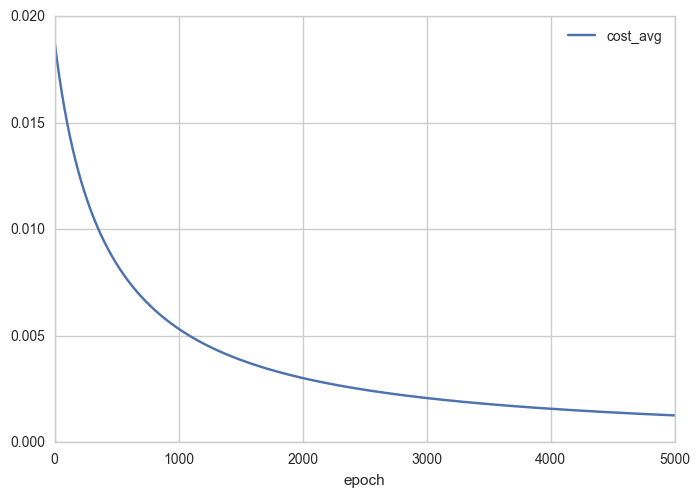

In [10]:
# Perform Training
iteration_count = 5000
eta.set_value(0.1)
# iterations

def collect_run_info(epoch):
    return pd.Series({
        'cost_avg': compute_avg_cost(data)
    }, name=epoch)

df_run_info = pd.DataFrame([collect_run_info(0)])
df_run_info.index.set_names(['epoch'], inplace=True)
    
for epoch in range(1, iteration_count+1):
    for row in data:
        update_all(row)
    df_run_info = df_run_info.append(collect_run_info(epoch))#pd.concat([df_run_info, collect_run_info(epoch)])
        
df_run_info.plot()